# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса "...Недвижимость" — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Содержание

* [1. Изучим общую информацию](#chapter1)
* [2. Предобработка данных](#chapter2)
* [3. Исследовательский анализ данных](#chapter3)
* [ Общий вывод](#chapter4)
        

### 1. Изучим общую информацию <a class="anchor" id="chapter1"></a>

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

None

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

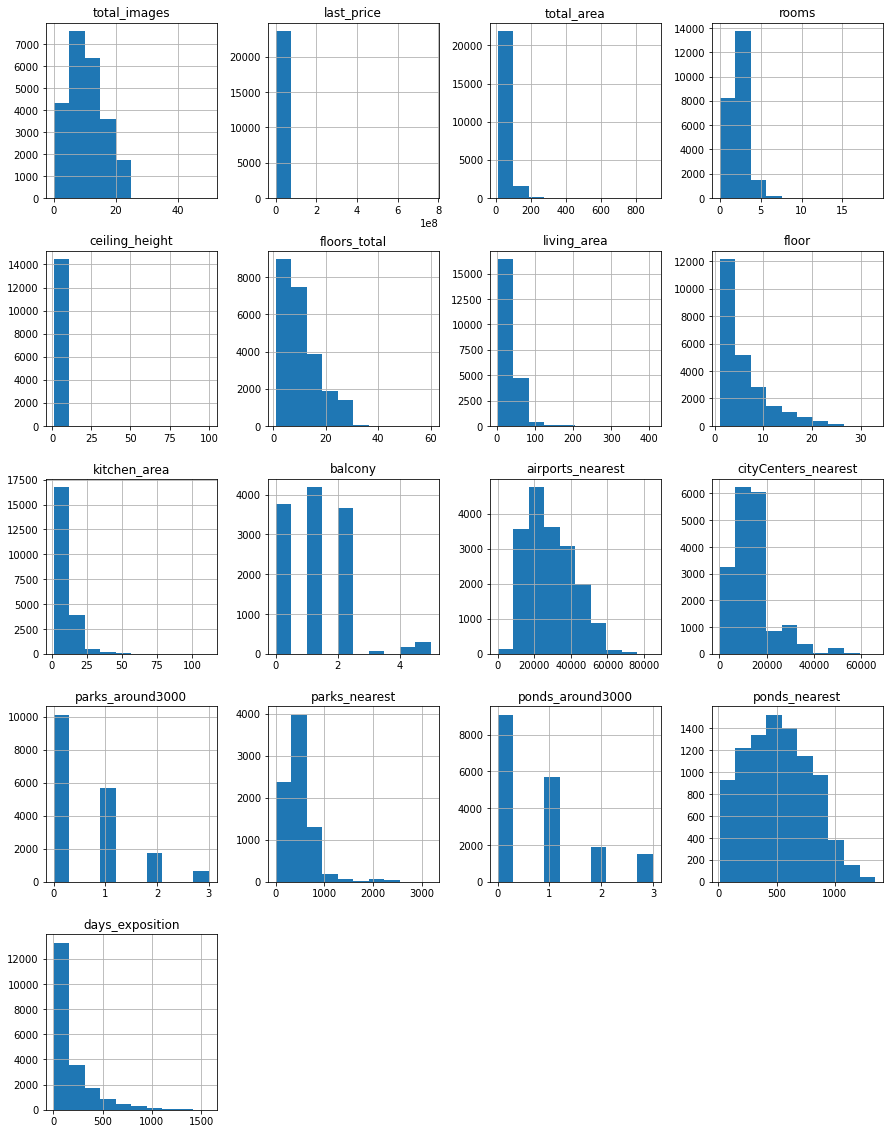

In [105]:
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
display(data.head())
display(data.info())
data.hist(figsize=(15, 20))

### 2. Предобработка данных <a class="anchor" id="chapter2"></a>

In [106]:
# 1) Определим, в каких столбцах есть пропуски.
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [107]:
# Проверим дубликаты. Их нет 
data.duplicated().sum()


0

In [109]:
# Заполните пропущенные значения там, где это возможно.
# Изменим следующие столбцы
data['is_apartment'] = data['is_apartment'].fillna(False)
data[['balcony', 
      'parks_around3000', 
      'ponds_around3000']] = data[['balcony',
                                   'parks_around3000',
                                   'ponds_around3000']].fillna(0)

<AxesSubplot:>

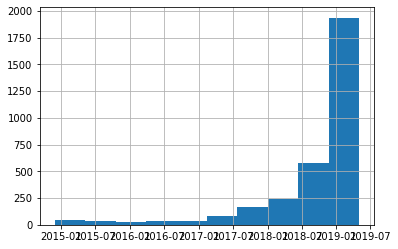

In [110]:
# посмотрим распредление пропущенных days_exposition 
data[['days_exposition', 'first_day_exposition']]
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])
data[data['days_exposition'].isna()]['first_day_exposition'].hist()

Вывод: <br>
По гисторамме выше видно, что большинство days_exposition находятся в последние годы. Можно предположить, что эти квартиры еще весят в объявлениях до сих пор и поэтому days_exposition не посчитаны. <br>
    У нас три выхода: <br>
    - либо посчитать сколько дней они уже провисели, но это может исказить данные, так как они может еще будут долго висеть, <br>
    - либо  удалить эти строки вообще,но потеряем информацию по другим параметрам этих квартир, <br>
    - либо заменить значения медианными. Этот вариант кажется предпочтительнее. <br>
    <br>
    Ниже заполним пропуски медианными значениями согласно названию населенных пунктов

In [66]:
# Создадим таблицу с медианными значениями days_exposition по населенным пунктам
locality_mean_price = data.pivot_table(index='locality_name', values='days_exposition', aggfunc='median')

# Добавим столбец 'days_exposition_replacement' в общую таблицу data. 
# В этом столбце медианные значения days_exposition расставлены в соотвествии с населенными пунктами
data = data.merge(locality_mean_price, on='locality_name', how='left', suffixes=(None, '_replacement'))

# заменим пропуски в days_exposition на значения из созданного столбца 'days_exposition_replacement'
data['days_exposition'] = data['days_exposition'].fillna(data['days_exposition_replacement'])

# удалим столбец 'days_exposition_replacement', больше он нам не понадобится
data = data.drop(columns='days_exposition_replacement')

# проверим, что не осталось пропусков в days_exposition
data['days_exposition'].isna().sum()


0

Вывод: <br> 
Возможные причины пропусков в данных: либо нет информации, либо нет данного объекта рядом(аэропорта, парка и тд) <br>
Можем изненить пропуски в следующих столбцах:<br>
1) is_apartment - на False - так как если не указано, то значит не аппартаменты <br>
2) balcony - на 0 - так как если не указано, то значит 0 балконов<br>
3) parks_around3000, ponds_around3000  на 0 - так как если не указано, то значит 0<br>
4) days_exposition - выше изменил на медианные значения <br>
5) высоту потолков изменим ниже<br>
6) пропуски в living_area и kitchen_area заполним ниже

In [85]:
# заполним пропуски в living_area и kitchen_area согласно total_area с учетом коэффициент отношения выбранной площади ко всей площади
# проверим, что в total_area нет пропусков
print(data['total_area'].isna().sum())
# найдем средний коэфкоэффициент отношения выбранной площади ко всей площади для living_area и kitchen_area соотвественно
living_coeff = (data['living_area']/data['total_area']).mean()
kitchen_coeff = (data['kitchen_area']/data['total_area']).mean()
# заполним пропуски путем умножения total_area на посчитанные коэффициенты
data['living_area'] = data['living_area'].fillna((living_coeff * data['total_area']))
data['kitchen_area'] = data['living_area'].fillna((kitchen_coeff * data['total_area']))


0


In [41]:
# 2) Найдем столбцы, в которых нужно изменить тип данных. Преобразуем тип данных в выбранных столбцах.
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])
data[['balcony', 'days_exposition']] = data[['balcony', 'days_exposition']].astype('int')
data[['parks_around3000', 'ponds_around3000']] = data[['parks_around3000', 'ponds_around3000']].astype('int')

Необходимо изненить тип данных следующие столбцах: 
- is_apartment - с object на bool, так как это bool величина как по условию, так и по логике True/False 
- balcony - с float на int, так как число балконов целое число 
- parks_around3000, ponds_around3000 - с float на int, так как количество парков/водоемов - это целое число 
- first_day_exposition - с object на datetime, так как это дата 
- days_exposition - с object на int, так как количество дней, и при том целое

In [91]:
# 3) Изучим уникальные значения в столбце с названиями и устраните неявные дубликаты.
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'деревня Агалатово', 'деревня Аро', 'деревня Батово',
       'деревня Бегуницы', 'деревня Белогорка', 'деревня Большая Вруда',
       'деревня Большая Пустомержа', 'деревня Большие Колпаны',
       'деревня Большое Рейзино', 'деревня Большой Сабск', 'деревня Бор',
       'деревня Борисова Грива', 'деревня Ваганово', 'деревня Вартемяги',
       'деревня Вахнова Кара', 'деревня Выскатка

In [87]:
# изменим в столбце locality_name все буквы Ё на е
data['locality_name'] = data['locality_name'].replace(['ё'],'е', 
    regex=True # чтобы искал по части названия, а не точному совпадению ячейки 
)
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалево',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Будогощь',
       'городской поселок Виллози', 'городской поселок Лесогорский',
       'городской поселок Мга', 'городской поселок Назия',
       'городской поселок Новоселье', 'городской поселок Павлово',
       'городской поселок Рощино', 'городской поселок Свирьстрой',
       'городской поселок Советский', 'городской поселок Фед

In [88]:
# В столбце с названиями data['locality_name'] приведем к одному виду типы поселений - поселки.
# сделаем это двумя способами для практики
# 1 способ) с помощью replace и regex
data['locality_name'] = data['locality_name'].replace(
           ['городской поселок', 
            'городской посёлок', 
            'посёлок городского типа',
            'поселок городского типа',
            'посёлок при железнодорожной станции',
            'посёлок'], 
    'поселок', 
    regex=True # чтобы искал по части названия, а не точному совпадению ячейки 
)
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалево',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'деревня Агалатово', 'деревня Аро', 'деревня Батово',
       'деревня Бегуницы', 'деревня Белогорка', 'деревня Большая Вруда',
       'деревня Большая Пустомержа', 'деревня Большие Колпаны',
       'деревня Большое Рейзино', 'деревня Большой Сабск', 'деревня Бор',
       'деревня Борисова Грива', 'деревня Ваганово', 'деревня Вартемяги',
       'деревня Вахнова Кара', 'деревня Выскатка

In [44]:
# 2 способ) Создадим функцию замены для нескольких выражений. 
# Выражения для замены задаваются в кортеже args. 
# Если слова из args имеется в объекте х - то,они заменяются на слово replacement
def replace_multy(x, *args, replacement):
    if x == x:   # проверяем, что не NaN, так как метод replace далее c NaN не сработает. Используем свойство, что (Nan != NaN)
        for word in args:
            x = x.replace(word, replacement)
        return x 
    return x # если NaN, то так и оставляем


# Применим созданную функцию replace_multy для столбца с наименованиями населенных пунктов в data['locality_name']
data['locality_name'] = data['locality_name'].apply(
    replace_multy,
    args = ('городской поселок', 
            'городской посёлок', 
            'посёлок городского типа',
            'поселок городского типа',
            'посёлок при железнодорожной станции',
            'посёлок'),
    replacement = 'поселок'
)


data['locality_name'].sort_values().unique()


array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'деревня Агалатово', 'деревня Аро', 'деревня Батово',
       'деревня Бегуницы', 'деревня Белогорка', 'деревня Большая Вруда',
       'деревня Большая Пустомержа', 'деревня Большие Колпаны',
       'деревня Большое Рейзино', 'деревня Большой Сабск', 'деревня Бор',
       'деревня Борисова Грива', 'деревня Ваганово', 'деревня Вартемяги',
       'деревня Вахнова Кара', 'деревня Выскатка

In [45]:
# 3) Найдем и устраним редкие и выбивающиеся значения.
# посмотрим на уникальные значения для ceiling_height
print(data['ceiling_height'].sort_values().unique())
# в значениях больше 10, значения указаны в других единицих, возможно в сантиметрах. Переведем их в метры
data['ceiling_height'] = data['ceiling_height'].apply(lambda x: x/10 if 10<=x<=32 else x)
data['ceiling_height'] = data['ceiling_height'].replace(100,1)
# Проверим. Все верно заменилось.
data['ceiling_height'].sort_values().unique()

[  1.     1.2    1.75   2.     2.2    2.25   2.3    2.34   2.4    2.45
   2.46   2.47   2.48   2.49   2.5    2.51   2.52   2.53   2.54   2.55
   2.56   2.57   2.58   2.59   2.6    2.61   2.62   2.63   2.64   2.65
   2.66   2.67   2.68   2.69   2.7    2.71   2.72   2.73   2.74   2.75
   2.76   2.77   2.78   2.79   2.8    2.81   2.82   2.83   2.84   2.85
   2.86   2.87   2.88   2.89   2.9    2.91   2.92   2.93   2.94   2.95
   2.96   2.97   2.98   2.99   3.     3.01   3.02   3.03   3.04   3.05
   3.06   3.07   3.08   3.09   3.1    3.11   3.12   3.13   3.14   3.15
   3.16   3.17   3.18   3.2    3.21   3.22   3.23   3.24   3.25   3.26
   3.27   3.28   3.29   3.3    3.31   3.32   3.33   3.34   3.35   3.36
   3.37   3.38   3.39   3.4    3.42   3.43   3.44   3.45   3.46   3.47
   3.48   3.49   3.5    3.51   3.52   3.53   3.54   3.55   3.56   3.57
   3.58   3.59   3.6    3.62   3.63   3.65   3.66   3.67   3.68   3.69
   3.7    3.75   3.76   3.78   3.8    3.82   3.83   3.84   3.85   3.86
   3.8

array([1.  , 1.03, 1.2 , 1.4 , 1.75, 2.  , 2.2 , 2.25, 2.26, 2.3 , 2.34,
       2.4 , 2.45, 2.46, 2.47, 2.48, 2.49, 2.5 , 2.51, 2.52, 2.53, 2.54,
       2.55, 2.56, 2.57, 2.58, 2.59, 2.6 , 2.61, 2.62, 2.63, 2.64, 2.65,
       2.66, 2.67, 2.68, 2.69, 2.7 , 2.71, 2.72, 2.73, 2.74, 2.75, 2.76,
       2.77, 2.78, 2.79, 2.8 , 2.81, 2.82, 2.83, 2.84, 2.85, 2.86, 2.87,
       2.88, 2.89, 2.9 , 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97, 2.98,
       2.99, 3.  , 3.01, 3.02, 3.03, 3.04, 3.05, 3.06, 3.07, 3.08, 3.09,
       3.1 , 3.11, 3.12, 3.13, 3.14, 3.15, 3.16, 3.17, 3.18, 3.2 , 3.21,
       3.22, 3.23, 3.24, 3.25, 3.26, 3.27, 3.28, 3.29, 3.3 , 3.31, 3.32,
       3.33, 3.34, 3.35, 3.36, 3.37, 3.38, 3.39, 3.4 , 3.42, 3.43, 3.44,
       3.45, 3.46, 3.47, 3.48, 3.49, 3.5 , 3.51, 3.52, 3.53, 3.54, 3.55,
       3.56, 3.57, 3.58, 3.59, 3.6 , 3.62, 3.63, 3.65, 3.66, 3.67, 3.68,
       3.69, 3.7 , 3.75, 3.76, 3.78, 3.8 , 3.82, 3.83, 3.84, 3.85, 3.86,
       3.87, 3.88, 3.9 , 3.93, 3.95, 3.98, 4.  , 4.

### Посчитаем параметры и добавим в таблицу новые столбцы

In [90]:
# добавим столбец m2_price цена одного квадратного метра. Округлим значения.
data['m2_price'] = round(data['last_price'] / data['total_area'])
# добавим стобец day_of_week - день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)
data['day_of_week'] = pd.DatetimeIndex(data['first_day_exposition']).day_of_week
# добавим стобец month - месяц публикации объявления
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month
# добавим стобец year -год публикации объявления
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year


In [91]:
# добавим стобец floor_type - тип этажа квартиры (значения — «‎первый», «последний», «другой»)
def floor_type(item):
    if item['floor'] == 1:
        return 'первый'
    if item['floor'] == item['floors_total']:
        return 'последний'
    return 'другой'

data['floor_type'] = data.apply(floor_type, axis=1)   

# изменим стобец cityCenters_nearest - расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).
data = data.assign(cityCenters_nearest = round(data['cityCenters_nearest']/1000)) 

### 3. Исследовательский анализ данных <a class="anchor" id="chapter3"></a>

array([[<AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'last_price'}>],
       [<AxesSubplot:title={'center':'rooms'}>,
        <AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floor'}>,
        <AxesSubplot:title={'center':'floors_total'}>],
       [<AxesSubplot:title={'center':'cityCenters_nearest'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'day_of_week'}>],
       [<AxesSubplot:title={'center':'month'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

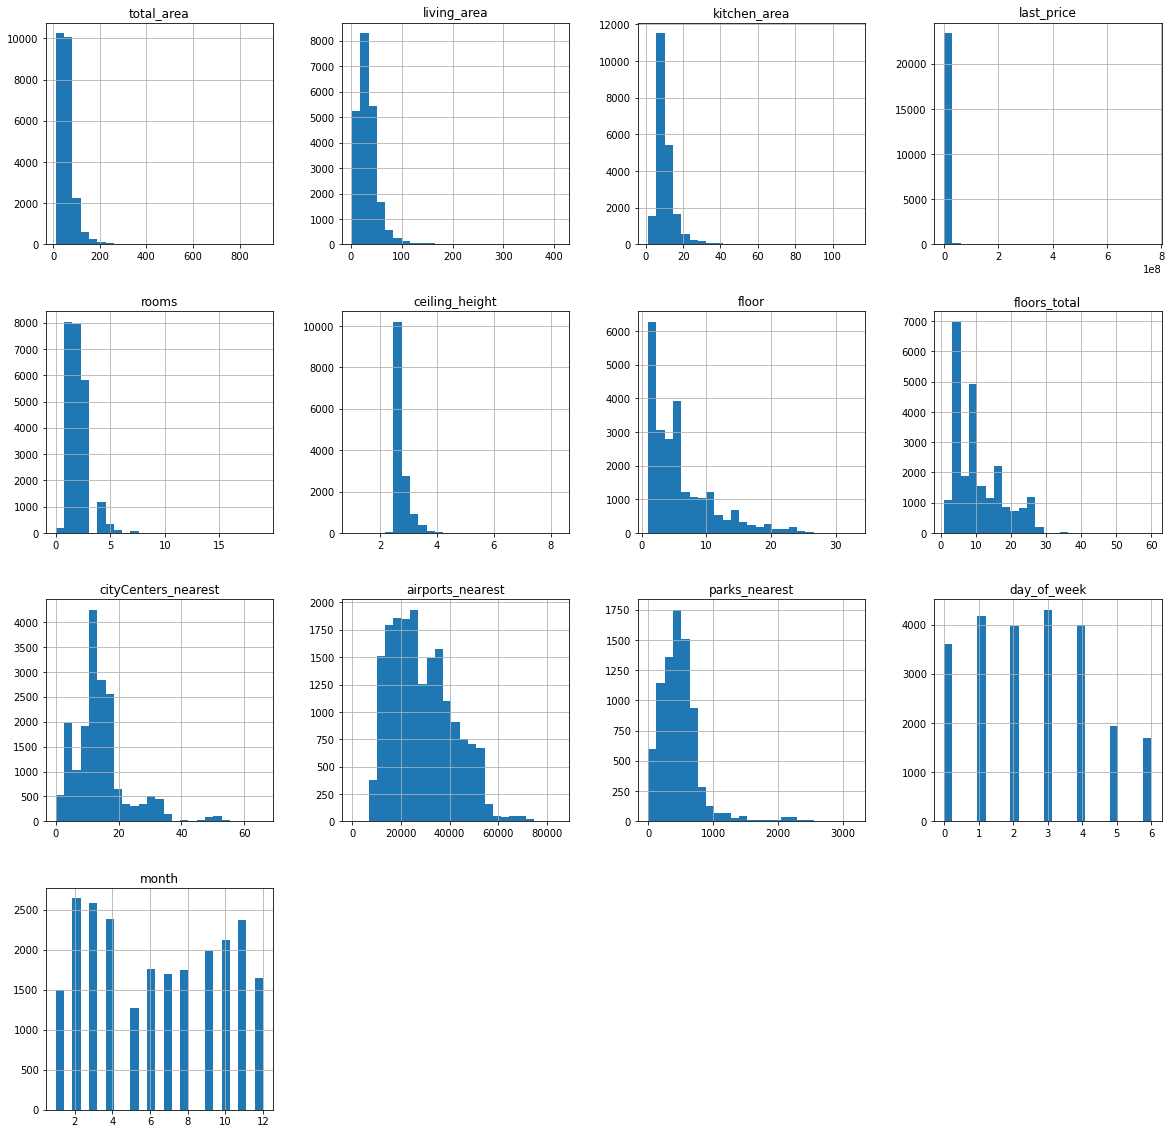

In [47]:
# 1) Построим гистограммы для всех значений таблицы
data.hist( bins=25,
    figsize=(20,20), 
          column = ['total_area',
                    'living_area', 
                    'kitchen_area', 
                    'last_price', 
                    'rooms', 
                    'ceiling_height', 
                    'floor',  
                    'floor_type', 
                    'floors_total',
                    'cityCenters_nearest', 
                    'airports_nearest', 
                    'parks_nearest',
                    'day_of_week', 
                    'month']
)

 Вывод <br> 
 Наблюдения по параметрам гистограмм выше:<br> 
 1) Гистограммы, кроме day_of_week и month тяготеют к нормальному распреелению. Гистограммы day_of_week и month скорее отражают сезонность. <br> 
 2)виден явный перекос в сторону квартир "подешевле", с меньшей площадью и другими соответсвующими дешевым квартирам параметрам. Таких квартир больше.<br> 
 3) преобладают малоэтажные дома(до 20 этажей), "небоскребов" не там много <br> 
 4) в будни люди чаще размещают объявления о продаже <br> 
 5) летом происходит спад на рынке недвижимости, возможно по причине отпусков <br> 
 6) близость к паркам преобладает над близостью к аэропортам, не все хотят слышал гул самолетов над головой <br> 
 7) многокомнатные квартиры(более 5 комнат) - "не в моде"

В среднем квартира продавалась за  157 дней
Медиана равна  74 дня


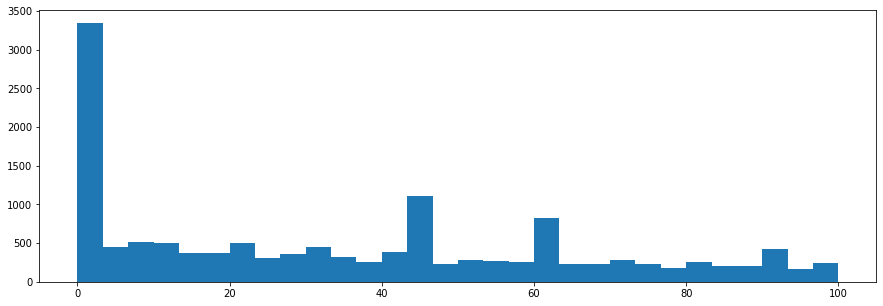

count    23699.000000
mean       156.608844
std        213.546873
min          0.000000
25%         22.000000
50%         74.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64


In [96]:
# 2) Изучим, как быстро продавались квартиры (столбец days_exposition) (сколько дней было размещено каждое объявление)

print('В среднем квартира продавалась за ', round(data['days_exposition'].mean()), 'дней')
print('Медиана равна ', round(data['days_exposition'].median()), 'дня')

import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
plt.hist(data['days_exposition'], bins=30, range=(0,100))
plt.show()

print(data['days_exposition'].describe())


Вывод: <br> 
Продажа в среднем занимает 74 дня (медианное значение). <br>
Продажи до 22 дней(первый квартиль Q1, первые 25% выборки) можно считать быстрыми, а более 199 дней долгими(третий квартиль Q3, последние 25% выборки).

Удалим для наглядности значения цены выше 7*10^7, что составляет в процентах 0.32 %
Матрица корреляции:
               last_price  total_area  living_area  kitchen_area     rooms  \
last_price      1.000000    0.653675     0.566492      0.519869  0.363343   
total_area      0.653675    1.000000     0.939537      0.609121  0.758344   
living_area     0.566492    0.939537     1.000000      0.428674  0.845977   
kitchen_area    0.519869    0.609121     0.428674      1.000000  0.269945   
rooms           0.363343    0.758344     0.845977      0.269945  1.000000   
floor_type      0.058917    0.064375     0.058319      0.048160  0.026327   
day_of_week     0.001550   -0.004695    -0.005605     -0.008480 -0.004134   
month           0.002779    0.004920    -0.002483      0.002499 -0.004469   

              floor_type  day_of_week     month  
last_price      0.058917     0.001550  0.002779  
total_area      0.064375    -0.004695  0.004920  
living_area     0.058319    -0.005605 -0.002483  
k

array([[<AxesSubplot:xlabel='last_price', ylabel='last_price'>,
        <AxesSubplot:xlabel='total_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='living_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='rooms', ylabel='last_price'>,
        <AxesSubplot:xlabel='floor_type', ylabel='last_price'>,
        <AxesSubplot:xlabel='day_of_week', ylabel='last_price'>,
        <AxesSubplot:xlabel='month', ylabel='last_price'>],
       [<AxesSubplot:xlabel='last_price', ylabel='total_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='living_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='total_area'>,
        <AxesSubplot:xlabel='floor_type', ylabel='total_area'>,
        <AxesSubplot:xlabel='day_of_week', ylabel='total_area'>,
        <AxesSubplot:xlabel='month', ylabel='t

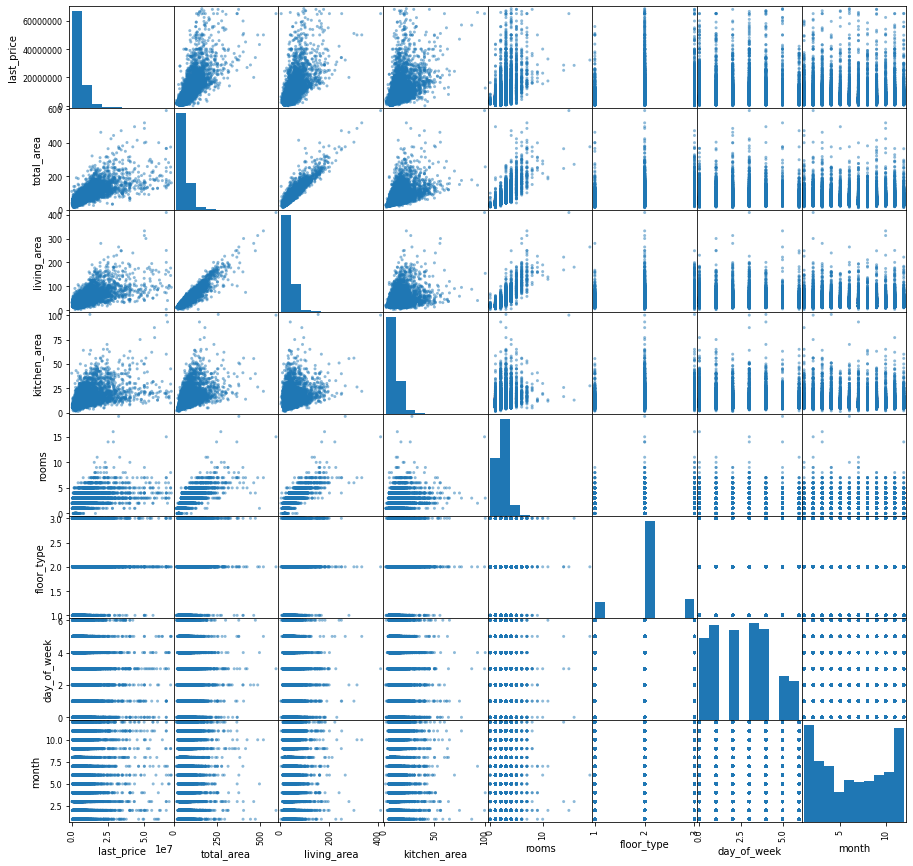

In [49]:
# 3) изучим какие факторы больше всего влияют на общую (полную) стоимость объекта
#pd.plotting.scatter_matrix(data[['living_area', 'rooms']], figsize=(9,9))

# Построим графики, которые покажут зависимость цены от заданных параметров.
# чтобы расчитать корреляцию для типов этажей, переведем их значения в числа 1,2,3
data['floor_type'] = data['floor_type'].replace('первый', 1) 
data['floor_type'] = data['floor_type'].replace('другой', 2) 
data['floor_type'] = data['floor_type'].replace('последний', 3) 

# заданные параметры объединим в data_for_corr и удалим для наглядности значения цены выше 7*10^7, что менее 0.5% значений
print('Удалим для наглядности значения цены выше 7*10^7, что составляет в процентах', 
      round(100 - data.query('last_price < 70000000')['last_price'].count() 
       / data['last_price'].count() * 100,2),'%'
)

data_for_corr = data[['last_price','total_area', 'living_area', 'kitchen_area', 'rooms', 'floor_type', 'day_of_week', 'month']]

print('Матрица корреляции:\n', data_for_corr.corr()) # расчитаем корреляцию до удаления данных, чтобы не исказить результат

data_for_corr = data_for_corr.query('last_price < 70000000') 
# построим матрицу диаграм рассеивания, верхние графики из матрицы будем использовать для анализа
#, так как они изображают зависимость от цены
pd.plotting.scatter_matrix(data_for_corr, figsize=(15, 15))




Как видно из матрици корреляции(верхние графики), величина корреляции цены и
- общей площади - средняя корреляция(максимальная из исследуемых),
- жилой площади - средняя корреляция,
- площади кухни - средняя корреляция,
- количества комнат - низкая корреляция,
- этажа, на котором расположена квартира (первый, последний, другой) - нет корреляции;
- даты размещения (день недели, месяц) - нет корреляции.
Вывод: больше всего на стоимость влияют площади квартир и их комнат.

In [53]:
#Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.
# Для этого сначала создадим таблицу max_cities с наименованиями населенных пунктов согласно такому условию
max_cities = data.groupby('locality_name')['locality_name'].count().sort_values(ascending=False)[:10]
print('10 населённых пунктах с наибольшим числом объявлений:\n', max_cities)
# затем создадим таблицу со средними ценами одного квадратного метра
cities_m2_price_mean = data.groupby('locality_name')['m2_price'].mean()

# затем объединим ее с общей таблицей, чтобы взять значения квадратных метров для этих населенных пунктов
max_cities_m2_price_mean = max_cities.to_frame().join(cities_m2_price_mean)['m2_price']
print('Cредняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений:\n', round(max_cities_m2_price_mean))

#Выделите населённые пункты с самой высокой и низкой средней стоимостью квадратного метра.
print('Самая высокая средняя стоимость квадратного метра в ', cities_m2_price_mean.idxmax())
print('Самая низкая средняя стоимость квадратного метра в ', cities_m2_price_mean.idxmin())



10 населённых пунктах с наибольшим числом объявлений:
 locality_name
Санкт-Петербург      15721
поселок Мурино         556
поселок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
поселок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64
Cредняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений:
 locality_name
Санкт-Петербург      114849.0
поселок Мурино        85682.0
поселок Шушары        78677.0
Всеволожск            68654.0
Пушкин               103126.0
Колпино               75425.0
поселок Парголово     90176.0
Гатчина               68746.0
деревня Кудрово       92474.0
Выборг                58142.0
Name: m2_price, dtype: float64
Самая высокая средняя стоимость квадратного метра в  Зеленогорск
Самая низкая средняя стоимость квадратного метра в  деревня Старополье


<AxesSubplot:xlabel='cityCenters_nearest'>

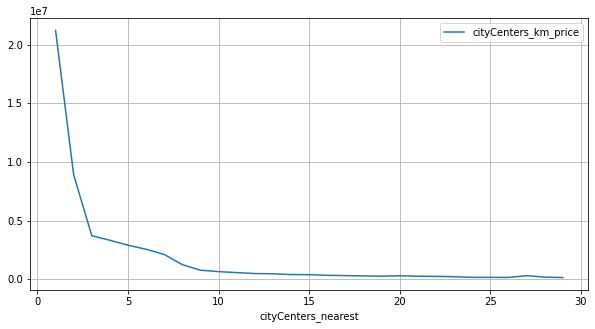

In [36]:
# вычислим среднюю цену каждого километра до центра в Санкт-Петербурге - новый столбец cityCenters_km_price
data = data.query('cityCenters_nearest != 0') # удаляем строки где растояние до центра 0 км
data =  data.dropna(subset=['cityCenters_nearest']) # удаляем строки где значение NaN
data_spb = data.query('locality_name == "Санкт-Петербург"').copy() # создадим таблицу с данными только по Санкт-Петербургу
data_spb['cityCenters_km_price'] = data_spb['last_price'] / data_spb['cityCenters_nearest']

# построим график зависимости стоимости объектов от расстояния до центра города.
data_spb[['cityCenters_nearest','cityCenters_km_price']
        ].groupby('cityCenters_nearest').mean().sort_values(by='cityCenters_nearest'
                                                           ).plot(figsize=(10,5), grid=True)

Вывод: <br> 
График зависимости стоимости объектов от расстояния до центра города показывает, что стоимость  увеличивается при приближении к центру города, причем это увеличение
- умеренное до расстояния в 10 км до центра, 
- значительное при приближении далее до 5 км до центра,
- и далее идет стремительное увеличение этой стоимости. 

### Общий вывод <a class="anchor" id="chapter4"></a>

Данные прошли предобработку, в том числе
- заполнены пропущенные значения там, где это возможно,
- преобразованы типы данных в столбцах,
- устранены неявные дубликаты в названиях населенных пунктов,
- найдите и устраните редкие и выбивающиеся значения в высоте потолков.

Добавлены в таблицу новые столбцы со следующими параметрами:
    цена одного квадратного метра;
    день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
    месяц публикации объявления;
    год публикации объявления;
    тип этажа квартиры (значения — «‎первый», «последний», «другой»);
    расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

Исследовательский анализ данных выявил:

I) На основе гистограмм:
    1) Гистограммы, кроме day_of_week и month тяготеют к нормальному распреелению. Гистограммы day_of_week и month скорее отражают сезонность. 
    2)виден явный перекос в сторону квартир "подешевле", с меньшей площадью и другими соответсвующими дешевым квартирам параметрам. Таких квартир больше. 
    3) преобладают малоэтажные дома(до 20 этажей), "небоскребов" не там много 
    4) в будни люди чаще размещают объявления о продаже 
    5) летом происходит спад на рынке недвижимости, возможно по причине отпусков 
    6) близость к паркам преобладает над близостью к аэропортам, не все хотят слышал гул самолетов над головой 
    7) многокомнатные квартиры(более 5 комнат) - "не в моде"
    
 II) В среднем квартира продавалась за  157 дней, причем медианное значение равно  74 дня   
 III) Из матрици корреляции обнаружили, что максимальная величина корреляции является между ценой и общей площадью
 IV) Самая высокая средняя стоимость квадратного метра в  Зеленогорске. Тогда как самая низкая средняя стоимость квадратного метра в  деревне Старополье 
 V) стоимость недвижимости  увеличивается при приближении к центру города, причем стремительно при приближении ближе 5 км до центра
 
    